## **Problem Statement: Predict student exam scores on a scale of 0-100% using a model that considers the number of hours studied.**

### Author: Mugilan K S

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Loading dataset

In [2]:
data = ("http://bit.ly/w-data")
df= pd.read_csv(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


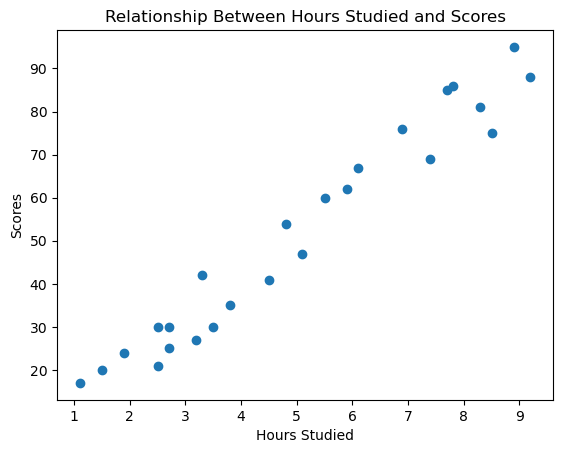

In [3]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.title('Relationship Between Hours Studied and Scores')
plt.show()

#### ** The graph shows a straight line going up from left to right. This means there's a positive connection between how long students study (hours studied) and their scores (percentage). In other words, students who study more tend to score higher.  **

##  Split Train and Test data

In [4]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [5]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 0)

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

### Plotting regression line

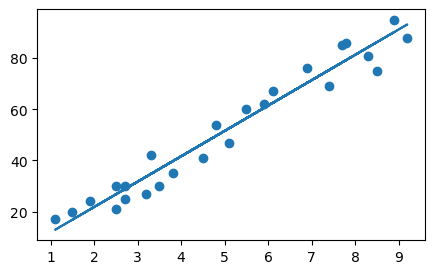

In [9]:
line = model.coef_*X + model.intercept_
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

### Prediction

In [10]:
y_pred = model.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [11]:
df01 = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df01

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Using the model to predict the exam score for a student who studied for 9.25 hours.**

In [13]:
hours = 9.25

# Reshape the data into a 2D array with one row and one column
hours_reshaped = np.array([hours]).reshape(1, -1)


own_pred = model.predict(hours_reshaped)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [14]:
from sklearn import metrics
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


In [16]:
from sklearn.metrics import r2_score
print('r2_score :',r2_score(y_test,y_pred))

r2_score : 0.9454906892105356


### The R-squared value of 0.96 indicates a strong positive relationship between the predicted and actual exam scores, suggesting good model performance.